# <span style="color:rgb(160,0,86)">Testverfahren mit Resampling</span>

***

## <span style="color:rgb(160,0,86)">Lernziele</span>

- Sie verstehen die Idee des **statistischen Testens**.
- Sie kennen den Unterschied zwischen der **Nullhypothese** und der **Alternativhypothese**.  
- Sie können mit dem **Permutationstest** und **Bootstrap-Test** Hypothesen testen.
- Sie können **p-Werte** bestimmen und kennen ihre Bedeutung.

***

### <span style="color:rgb(160,0,86)">Was ist ein statistischer Hypothesen-Test?</span>

Die **Versuchsplanung** ist ein Eckpfeiler der statistischen Praxis. In praktisch allen angewandten Forschungsbereichen werden Experiment entworfen,  <center><span style="color:rgb(160,0,86)"> **um eine Hypothese zu bestätigen oder zu verwerfen**.</span></center> 

<span style="color:rgb(160,0,86)"> ***Merksatz:***</span> Eine **Hypothese** ist eine **behauptete Annahme** über einen Zusammenhang in der Welt, die man **durch Daten überprüfen** kann.

Datenwissenschaftler führen etwa kontrollierte Experimente durch (z.B. A/B-Tests, Stichproben-Tests, multivariate Tests), um zu verstehen, wie **Änderungen an** 
- **Benutzerschnittstellen** (User Interface = UI) <br>*"Wenn der Kaufen-Button grösser ist, klicken mehr Nutzer darauf."*
- **Marketingstrategien** <br>*"Personalisierte E-Mail (statt Standardmail) erhöht die Öffnungsrate"*
- **Funktionsdesign** <br>*"Bestellvorgang mit nur 3 statt 5 Schritten führt zu weinger Abbrüchen."*
- **Prozessen** <br> *"Entspricht die durchschnittliche Ladezeit einer Website nach einem Systemupdate noch dem bisherigen Sollwert von zwei Sekunden."*
 
die **Zufriedenheit** der Nutzer oder das **Verhalten** eines Systems  **beeinflussen**.

Die klassische **Pipeline statistischer Schlussfolgerungen** ist zusammengefasst: 

$$\left.\begin{array}{l}
\text{Hypothese}\\
\text{aufstellen}\end{array}\right\}\Longrightarrow\;\;
\left.\begin{array}{l}
\text{expreimentelles}\\
\text{Design wählen}\end{array}\right\}\Longrightarrow\;\;
\left.\begin{array}{l}
\text{Daten}\\
\text{sammeln}\end{array}\right\}\Longrightarrow\;\;
\begin{array}{l}
\text{Schlussfolgerung}\\
\text{machen}\end{array}$$
 
- Dieser Prozess beginnt mit einer **Hypothese** (*"Medikament A ist besser als das bestehende Standardmedikament"*, *"Preis A ist profitabler als der bestehende Preis B"*).
- Ein **Experiment** (z.B. ein *A/B-Test*) wird entworfen, um die Hypothese zu testen - und zwar so, dass es hoffentlich schlüssige Ergebnisse liefert.
- Die **Daten** werden gesammelt und analysiert,
- und dann wird eine **Schlussfolgerung** gezogen.

<span style="color:rgb(160,0,86)"> ***Bemerkung:***</span> Mit Schlussfolgerung ist gemeint, dass man Erkenntnisse aus einer **kleinen Stichprobe** auf eine **grössere Gruppe** oder einen **allgemeinen Prozess** überträgt.


### <span style="color:rgb(160,0,86)">Warum machen wir einen Hypothesen-Test?</span>

Wir möchten herausfinden, ob **der Zufall** für einen beobachteten Effekt **verantwortlich** sein könnte.

Im Hinterkopf steht oft eine **Hypothese**, etwa: *"Der Preis B bringt einen höheren Gewinn".* 

<span style="color:rgb(160,0,86)"> ***Frage:***</span> Warum brauchen wir eine Hypothese? Warum schaut man sich nicht einfach das Ergebnis des Experiments an und entscheidet sich für die Situation, die besser abschneidet?

Weil unser Verstand dazu neigt, die **Tragweite des Zufallsverhaltens** zu unterschätzen. Dies äussert sich unter anderem darin, dass
- extreme Ereignisse nicht vorhergesehen werden. 
- zufällige Eignisse **fälschlicherweise als Muster** mit einer gewissen Bedeutung interpretiert werden. 

<span style="color:rgb(160,0,86)">***Das systematische Vorgehen bei der Hypothesenprüfung wurde erfunden, um die Forscher davor zu schützen, vom Zufall getäuscht zu werden.***</span>

Die menschliche Tendenz, den Zufall zu unterschätzen, kann man in einem Experiment beobachten: 

*Bitte mehrere Freunde, sich eine Folge von 50 Münzwürfen auszudenken und aufzuschreiben. Danach sollen sie wirklich 50 Mal eine Münze werfen und auch diese Ergebnisse notieren.
Wenn die echten und die ausgedachten Ergebnisse getrennt auf zwei Stapel gelegt werden, wirst du schnell erkennen, in welchem Stapel die echten sind:*
- In den echten Ergebnissen kommen längere Reihen von **Kopf**
oder **Zahl** vor.

Bei 50 echten Münzwürfen ist es nicht ungewöhnlich, fünf- oder sechsmal die gleiche Seite der Münze zu sehen. Wenn wir jedoch zufällige Münzwürfe erfinden, wechseln wir nach vier oder fünf gleichen Seiten, damit die Serie zufällig aussieht.

***Dadurch neigen wir dazu, eine Serie von sechs gleichen Münzwürfen beim echten Werfen nicht als Zufall zu sehen, sondern als etwas Bedeutungsvolles.***



### <span style="color:rgb(160,0,86)">Auf welcher Logik beruht ein Hypothesen-Test?</span>

Weil wir die Tendenz haben, ein ungewöhnliches, aber zufälliges Verhalten als etwas Bedeutungsvolles zu interpretieren, verlangen wir in unseren Experimenten den **Nachweis**, dass **ein Unterschied extremer ist als das**, was **der Zufall** vernünftigerweise hervorbringen könnte.

<span style="color:rgb(160,0,86)"> ***Merksatz:*** </span> Die **Grundannahme** ist, dass ein Unterschied **nur auf den Zufall** zurückzuführen ist - diese Annahme wird als **Nullhypothese** bezeichnet. 

- <span style="color:rgb(160,0,86)">***Wir hoffen nun, dass wir diese Nullhypothese widerlegen können und mit dem Experiment zeigen können, dass ein Unterschied grösser ist, als es der Zufall zulässt.***</span>

Ein Hypothesen-Test beinhalten naturgemäss nicht nur eine Nullhypothese, sondern auch eine **entgegengesetzte Alternativhypothese**. Wir unterscheiden zwischen **einseitigen** und **zweiseitigen** Tests – je nachdem, welche Art von Alternativhypothese wir prüfen möchten:

- <span style="color:rgb(160,0,86)">**Einseitiger Test:**</span> <br> Wenn wir eine ***gerichtete Alternativhypothese*** formulieren, also vermuten, dass ein Effekt in eine bestimmte Richtung auftritt (z.B. dass Methode B bessere Ergebnisse liefert als Methode A), dann verwenden wir einen einseitigen Hypothesen-Test. <br> ***In diesem Fall berücksichtigen wir nur extreme Zufallsergebnisse in dieser einen Richtung.***

- <span style="color:rgb(160,0,86)">**Zweiseitiger Test:**</span> <br> Wenn wir eine ***ungerichtete Alternativhypothese*** prüfen, also lediglich annehmen, dass sich zwei Ergebnisse irgendwie unterscheiden (z.B. dass Methode A und Methode B unterschiedliche Ergebnisse liefern, ohne eine Richtung vorzugeben), dann verwenden wir einen zweiseitigen Hypothesen-Test. <br> ***In diesem Fall werden extreme Zufallsergebnisse in beiden Richtungen berücksichtigt*** – also sowohl deutlich höhere als auch deutlich niedrigere Werte.

<span style="color:rgb(160,0,86)">***Merksatz:***</span> Zusammen müssen die **Null- und die Alternativhypothese alle Möglichkeiten** abdecken. 


Die Art der Nullhypothese bestimmt die Struktur des Hypothesen-Tests. Zum Beispiel:
1) ***Nullhypothese:*** <br> *"Es gibt keinen Unterschied zwischen den Mittelwerten von A und B."*</br>
***Ungerichtete Alternativhypothese:*** <br> *"Der Mittelwert von A unterscheidet sich vom Mittelwert von B (kann grösser oder kleiner sein)."* <br> <span style="color:rgb(160,0,86)">$\qquad\pmb{\Longrightarrow}\;\;$ **Zweiseitiger Hypothesen-Test**</span>
3) ***Nullhypothese:*** <br> *"Der Mittelwert von A ist kleiner oder gleich als der Mittelwert von B."*</br>
***Gerichtete Alternativhypothese:*** <br> *"Der Mittelwert von B ist grösser als der Mittelwert von A."* <br> <span style="color:rgb(160,0,86)">$\qquad\pmb{\Longrightarrow}\;\;$ **Einseitiger Hypothesen-Test**</span>
4) ***Nullhypothese:*** <br> *"Der Mittelwert von B ist um $5\%$ grösser als der Mittelwert von A."*</br>
***Gerichtete Alternativhypothese:*** <br> *"Der Mittelwert von B ist nicht um $5\%$ grösser als der Mittelwert von A."* <br> <span style="color:rgb(160,0,86)">$\qquad\pmb{\Longrightarrow}\;\;$ **Einseitiger Hypothesen-Test**</span>

### <span style="color:rgb(160,0,86)">Wie können wir mit einer Stichprobe den Test entscheiden?</span>

**Resampling-Verfahren** bilden eine allgemeine Klasse statistischer Methoden, die auf ***wiederholtem Ziehen*** oder ***Neuordnen*** der **vorhandenen Daten** beruhen.
- <span style="color:rgb(160,0,86)"> ***Ziel ist es, die Bedeutung eines beobachteten Unterschieds oder Abweichung ohne Annahmen über die zugrunde liegende Verteilung der Grundgesamtheit zu beurteilen.***</span>

Wir unterscheiden zwischen **Permutationstest** und **Bootstrap-Test**:

##### <span style="color:rgb(160,0,86)"><strong>1) Permutationstest – Vergleich von zwei Gruppen</strong></span>

Der **Permutationstest** prüft, ob zwischen zwei (oder mehr) Gruppen ein systematischer Unterschied besteht.
Wenn die Nullhypothese gilt (es gibt keinen echten Unterschied), dann ist es Zufall, welche Beobachtung zu welcher Gruppe gehört.

Daher können wir die ***Gruppenzugehörigkeiten zufällig vertauschen*** (permutieren) und beobachten, wie stark sich die Gruppenunterschiede rein zufällig verändern.

<span style="color:rgb(160,0,86)"> ***Pseudocode:*** </span>

<tt> <strong>Eingabe:</strong> Daten aus zwei Gruppen A und B <br>
<strong>Schritt 1:</strong> Berechne den beobachteten Unterschied $\Delta_{\text{beobachtet}}$ <br> <strong>Schritt 2:</strong> Wiederhole viele Male: <br>
$\quad\quad$ <strong>a)</strong> Lege die Werte aus A und B zusammen.<br>
$\quad\quad$ <strong>b)</strong> Teile sie zufällig in zwei Gruppen gleicher Grösse wie A und B<br>
$\quad\quad$ <strong>c)</strong> Berechne erneut den Unterschied $\Delta_{\text{bootstrap}}$ und speichere ihn<br>
<strong>Schritt 3:</strong> Bestimme die relative Häufigkeit, wie oft der Unterschied $\Delta_{\text{bootstrap}}$ gemäss der Nullhypothese mindestens so extrem ist wie $\Delta_{\text{beobachtet}}$. <br> <strong>Ausgabe:</strong> Der p-Wert, also die bei Schritt 3 berechnete relative Häufigkeit. <br></tt>


##### <span style="color:rgb(160,0,86)"><strong>2) Bootstrap-Test – Prüfung einer Stichprobe gegen einen Sollwert</strong></span>

Wenn wir nur eine Stichprobe haben und prüfen möchten, ob sie **mit einem Sollwert** (z.B. mittlere Ladezeit) übereinstimmt, können wir keinen Permutationstest verwenden – es gibt ja keine zweite Gruppe, deren Werte vertauscht werden könnten.

Stattdessen nutzen wir den **Bootstrap-Ansatz** und ziehen wiederholt ***Zufallsstichproben mit Zurücklegen*** aus den vorhandenen Daten und vergleichen unter der Annahme der Nullhypothe dieses Resample mit dem Sollwert.

<span style="color:rgb(160,0,86)"> ***Pseudocode:*** </span>

<tt> <strong>Eingabe:</strong> Stichprobe $x_1, x_2, ... , x_n$ und Sollwert $\theta_0$ <br>
<strong>Schritt 1:</strong> Berechne den beobachteten Wert $\theta_{\text{beobachtet}}$ in der Stichprobe<br> <strong>Schritt 2:</strong> Wiederhole viele Male: <br>
$\quad\quad$ <strong>a)</strong> Ziehe $n$ Werte mit Zurücklegen aus der Stichprobe<br>
$\quad\quad$ <strong>b)</strong> Berechne erneut den Wert $\theta_{\text{bootstrap}}$ und speichere ihn. <br>
<strong>Schritt 3:</strong> Verschiebe die Bootstrap-Werte dorthin,
wo sie unter der Nullhypothese liegen würden, also $\theta_{\text{shift}} = \theta_{\text{bootstrap}}\,-\,$mean$(\theta_{\text{bootstrap}}) + \theta_0$.<br>
<strong>Schritt 4:</strong> Bestimme die relative Häufigkeit, wie oft $\theta_{\text{shift}}$ gemäss der Nullhypothese mindestens so extrem ist wie $\theta_{\text{beobachtet}}$. <br> <strong>Ausgabe:</strong> Der p-Wert, also die bei Schritt 4 berechnete relative Häufigkeit. <br></tt>
 


<span style="color:rgb(160,0,86)"> **Vergleich zu klassischen Tests:** </span>

Klassische **formelbasierte Verfahren** wie der t-Test oder die ANOVA berechnen den p-Wert analytisch mit Formeln, setzen aber bestimmte restriktive Annahmen  voraus. Zum Beispiel: 
- ***Normalverteilung der Daten*** in der Grundgesamtheit,
- ***Kenntnis der mittleren quadratischen Abweichung*** in der Grundgesamtheit,
- ***Unabhängigkeit beim Ziehen*** der Stichprobe,
- etc.

**Resampling-Verfahren** (Permutation oder Bootstrap) sind dagegen besonders nützlich bei kleinen Stichproben oder unklaren Verteilungen. Denn sie sind ***nicht-parametrisch***, also unabhängig von Verteilungsannahmen.

<span style="color:rgb(160,0,86)"> ***Merksatz:*** </span> **Permutationstests** eignen sich zum Vergleich von Gruppen und
**Bootstrap-Tests** zum Vergleich einer Stichprobe mit einem Sollwert. Beide Verfahren gehören zur Familie der **Resampling-Methoden** und liefern **empirische p-Werte**, ohne auf theoretische Formeln angewiesen zu sein.


<span style="color:rgb(160,0,86)"> **Der p-Wert und das Signifikanzniveau:** </span>

Der in den Algorithmen berechnete **p-Wert** gibt an, wie wahrscheinlich es wäre, ein Ergebnis zu beobachten, das ***mindestens so extrem ist wie das tatsächlich gemessene  – unter der Annahme, dass die Nullhypothese gilt***.

- Bei einem **einseitigen Test** wird nur geprüft, ob ein Effekt in eine bestimmte Richtung auftritt (z.B. ob ein Mittelwert grösser ist als erwartet). <br> <span style="color:rgb(160,0,86)">$\qquad\pmb{\Longrightarrow}\;\;$ **die Wahrscheinlichkeit wird auf einer Seite der Verteilung aufgeteilt**</span> <br> Beim Berechnen des p-Werts werden nur die Permutations- oder Bootstrap-Ergebnisse gezählt, die in diese Richtung mindestens so extrem sind wie der beobachtete Wert.

- Bei einem **zweiseitigen Test** wird geprüft, ob der beobachtete Wert in irgendeine Richtung von der Nullhypothese abweicht – also grösser oder kleiner.
<br> <span style="color:rgb(160,0,86)">$\qquad\pmb{\Longrightarrow}\;\;$ **die Wahrscheinlichkeit wird auf beiden Seiten der Verteilung aufgeteilt**</span> <br> Beim berechnen des p-Werts werden die Permutations- oder Bootstrap-Ergebnisse gezählt, deren Abweichung mindestens so extrem sind wie der beobachtete Wert.

Die p-Werte sind immer Zahlen zwischen Null und Eins:
- Ein **p-Wert** nahe **bei 0** zeigt, dass ***das beobachtete Resultat*** unter der Nullhypothese ***sehr ungewöhnlich*** wäre.
- Ein **p-Wert** nahe **bei 1** zeigt, dass ***das beobachtete Resultat*** sehr wohl ***mit Zufall erklärbar*** ist.

Das **Signifikanzniveau** (oft $\alpha = 0.05$ oder $\alpha = 0.01$) legt fest, ***ab welchem p-Wert*** wir ein Ergebnis als ***statistisch signifikant*** betrachten. Es gibt also die **Grenze** an, bei der wir entscheiden, ob der beobachtete Unterschied noch **durch Zufall** erklärt werden kann oder **nicht mehr plausibel zufällig** erscheint.

<span style="color:rgb(160,0,86)"> ***Testentscheid:*** </span>
- Wenn $\text{ p-Wert} \leqslant \alpha$, wird die **Nullhypothese verworfen**, das Ergebnis gilt als statistisch signifikant.
- Wenn $\text{ p-Wert} > \alpha$, wird  die **Nullhypothese beibehalten**, es gibt keinen ausreichenden Beleg für einen echten Unterschied.

<span style="color:rgb(160,0,86)"> ***Wichtig:*** </span> Ein ***nicht signifikanter Test*** bedeutet nicht, dass die Nullhypothese wahr ist, sondern nur, dass die ***Daten keinen starken Widerspruch*** zur Nullhypothese liefern.

Bei der Bewertung der statistischen Signifikanz sind zwei Arten von Fehlern möglich: 
- **Fehler des Typs 1**, bei dem man irrtümlich zu dem Schluss kommt, dass ein Effekt tatsächlich vorhanden ist, obwohl er in Wirklichkeit nur auf Zufall beruht
- **Fehler des Typs 2**, bei dem man irrtümlich zu dem Schluss kommt, dass ein Effekt nicht vorhanden ist, also auf Zufall beruht, obwohl er tatsächlich vorhanden ist

Eigentlich ist *ein Fehler des Typs 2* weniger ein Fehler als vielmehr die Einschätzung, dass der **Stichprobenumfang zu klein** ist, um den **Effekt zu erkennen**: 
- Wenn ein **p-Wert die Signifikanzbedingung nicht erfüllt**, heisst das,  <span style="color:rgb(160,0,86)">***dass ein Effekt nicht nachgewiesen ist. Es könnte sein, dass eine grössere Stichprobe einen kleineren p-Wert ergeben würde.***</span>
  
Die grundlegende Funktion von Hypothesentests besteht darin, sich vor zufälligen Fehlern zu schützen. Daher sind sie in der Regel so aufgebaut, <span style="color:rgb(160,0,86)">***dass Fehler vom Typ 1 minimiert werden.***</span>


### <span style="color:rgb(160,0,86)">Was ist ein A/B-Test?</span>

Ein ordungsgemässer A/B-Test hat **Probanden**, die **der einen** oder **anderen Behandlung** zugewiesen werden. Dabei kann es sich zum Beispiel um eine *Person*, einen *Pflanzensamen*, einen *Webbesucher* etc. handeln; entscheidend ist, dass die Testperson der Behandlung ausgesetzt wird. 

Im Idealfall werden die Probanden nach dem **Zufallsprinzip** den Behandlungen zugewiesen. Auf diese Weise weiss man, dass jeder **Unterschied zwischen den Behandlungsgruppen** auf zwei Faktoren zurückzuführen ist:
- Die **Wirkung** der verschiedenen Behandlungen
- das **Losglück** bei der Zuordnung der Probanden zu den Behandlungen (d.h. die zufällige Zuordnung kann dazu geführt haben, dass die von Natur aus leistungsstärkeren Probanden in A oder B konzentriert sind)

Um die Gruppe A mit der Gruppe B zu vergleichen, brauchen wir eine **Metrik**. In der Datenwissenschaft wird häufig ***eine binäre Variable als Metrik*** verwendet: *Klick oder kein Klick*, *kaufen oder nicht kaufen*, *Betrug oder kein Betrug* usw. 

Die Ergebnisse werden in einer 2×2-Tabelle zusammengefasst:

$$\begin{array}{c|cc}
&\text{Probanden A}&\text{Probanden B}\\ \hline 
\text{Ja}&\cdots&\cdots\\
\text{Nein}&\cdots&\cdots\end{array}$$

Oft ist eine der beiden Behandlungen die ***bestehende Standardbehandlung*** oder ***keine Behandlung***, die sogenannte **Kontrollgruppe**. 

<span style="color:rgb(160,0,86)">**Warum braucht es eine Kontrollgruppe?**</span>

Warum lässt man die Kontrollgruppe nicht einfach weg und führt ein Experiment durch, bei dem die betreffende ***Behandlung nur bei einer Gruppe*** angewendet wird, und vergleicht das Ergebnis ***mit früheren Erfahrungen***? 

**Ohne eine Kontrollgruppe** gibt es keine Gewähr dafür, dass ***alle anderen Dinge gleich sind*** und dass ein Unterschied wirklich auf die Behandlung (oder den Zufall) zurückzuführen ist. 

**In der Kontrollgruppe gelten die gleichen Bedingungen** (mit Ausnahme der Behandlung, die uns interessiert) wie für die Behandlungsgruppe. Wenn wir einfach einen ***Vergleich mit der Ausgangslage*** oder ***früheren Erfahrungen*** anstellen, könnten neben der Behandlung **auch andere Faktoren** unterschiedlich sein.

- Eine **Blindstudie** ist eine Studie, bei der die Probanden nicht wissen, ob sie Behandlung A oder Behandlung B erhalten.
- Eine **Doppelblindstudie** ist eine Studie, bei der die Prüfer und Betreuer (z.B. Ärzte und Krankenschwestern in einer medizinischen Studie) nicht wissen, welche Probanden welche Behandlung erhalten.

Eine **typische Hypothese** ist, dass eine **neue Behandlung besser** ist als die bisherige (also die Kontrollgruppe).

Einige Beispiele für A/B-Tests sind:
- Testen ***zweier Dünger***, um festzustellen, welcher eine bessere Keimung der Samen bewirkt
- Testen ***zweier Therapien***, um festzustellen, welche den Krebs effektiver bekämpft
- Testen ***zweier Preisen***, um festzustellen, welcher mehr Nettogewinn abwirft
- Testen ***zweier Web-Anzeigen***, um festzustellen, welche mehr Konversionen erzeugt
- Testen ***zweier Web-Schlagzeilen***, um festzustellen, welche mehr Klicks erzeugt

<center>
<img src="Bilder/Schlagzeilen.png" width="55%" />
</center>

A/B-Tests sind im **Webdesign** und **-marketing** weit verbreitet, weil da Ergebnisse leicht messbar sind.

### <span style="color:rgb(160,0,86)">Aufgabe 1 (Web-Stickiness)</span>

Ein Unternehmen, das eine relativ hochwertige Dienstleistung vertreibt, möchte testen, welche von ***zwei Webpräsentationen*** besser verkauft werden kann. Aufgrund des hohen Wertes der zu verkaufenden Dienstleistung sind die Verkäufe selten und der Verkaufszyklus ist lang; es würde ***zu lange dauern***, um genügend Verkäufe zu erzielen, um zu wissen, ***welche Präsentation besser ist***. Daher beschliesst das Unternehmen, die Ergebnisse mit einer ***Proxy-Variablen*** zu messen, und zwar mit der detaillierten *Landingpage*, auf der die Dienstleistung beschrieben wird.

Eine ***mögliche Proxy-Variable*** für das Unternehmen ist die **Anzahl der Klicks** auf der detaillierten Landingpage. Eine noch bessere Variable ist die **Verweildauer der Besucher** auf der Seite. Es ist vernünftig anzunehmen, dass eine Webpräsentation (als einzelne Seite), die die Aufmerksamkeit der Besucher länger auf sich zieht, zu mehr Verkäufen führt. 

- <span style="color:rgb(160,0,86)">***Unsere Kennzahl ist daher die durchschnittliche Verweildauer (von Google Analytics), wobei wir Seite A mit Seite B vergleichen.***</span>

Da es sich hier um eine interne, zweckgebundene Seite handelt, erhält sie keine grosse Anzahl von Besuchern. Das Ergebnis sind **insgesamt 36 Sitzungen** für die beiden verschiedenen Webpräsentationen, **21 für Seite A** und **15 für Seite B**. 

- **Laden Sie die Daten der Stichprobe** in der Datei *web_page_data.csv* im Ordner Daten. 
- Zeichnen Sie für die Verweildauer **zwei Boxplots**, je für die Seite A und für die Seite B.
- Bestimmen Sie den **Unterschied der mittleren Verweildauer** auf den beiden Seiten in der Stichprobe.
- Bestimmen Sie mit dem **Permutationsverfahren** eine Menge von 1000 permutieren Unterschieden und stellen Sie die **Verteilung dieser permutierten Unterschiede** in einem Dichtediagramm dar. Geben Sie auch den **p-Wert** an!
- Zeichnen Sie in das gleiche Dichtediagramm auch den **beobachteten Unterschied** ein.   
- Machen Sie den **Testentscheid** auf einem Signifikanzniveau von $\alpha = 5\%$. 


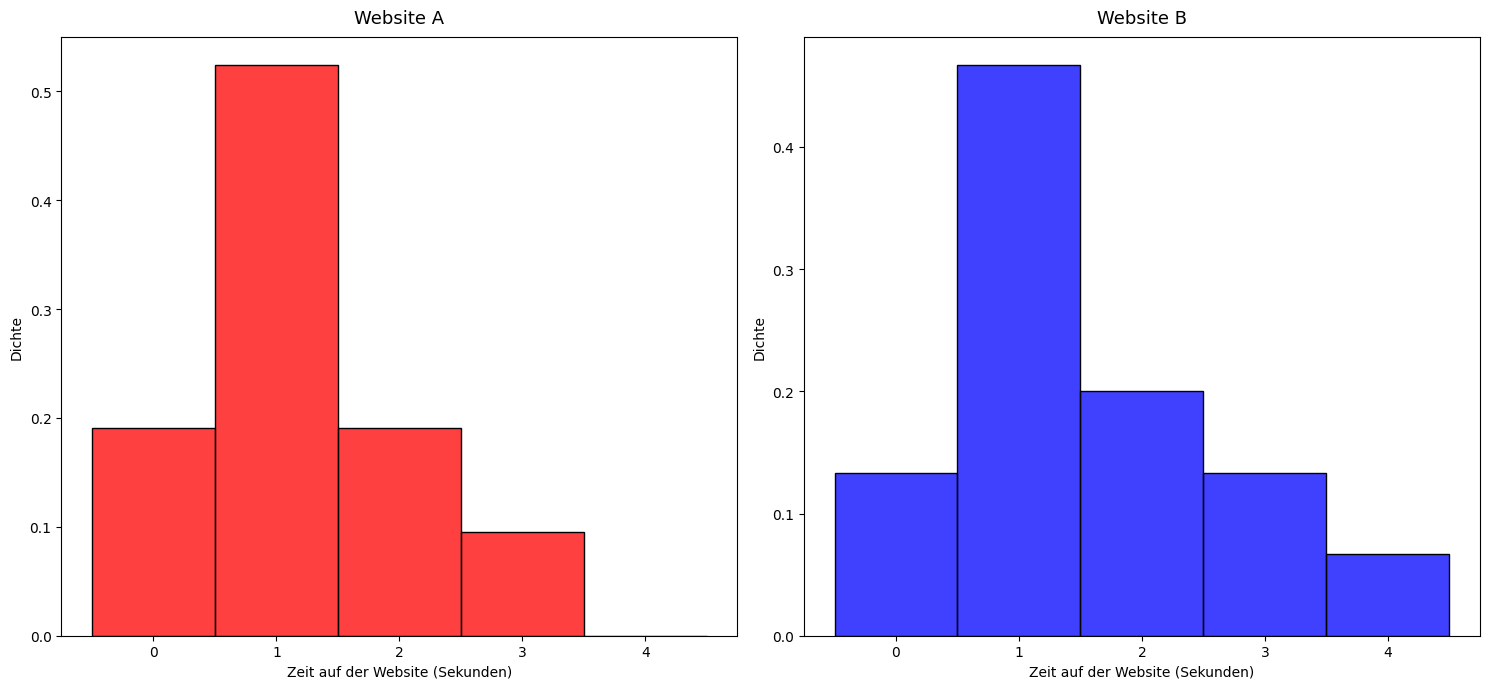

Durchschnittliche Verweildauer A: 1.26 Sekunden
Durchschnittliche Verweildauer B: 1.62 Sekunden
Beobachteter Unterschied der Mittelwerte: -0.357


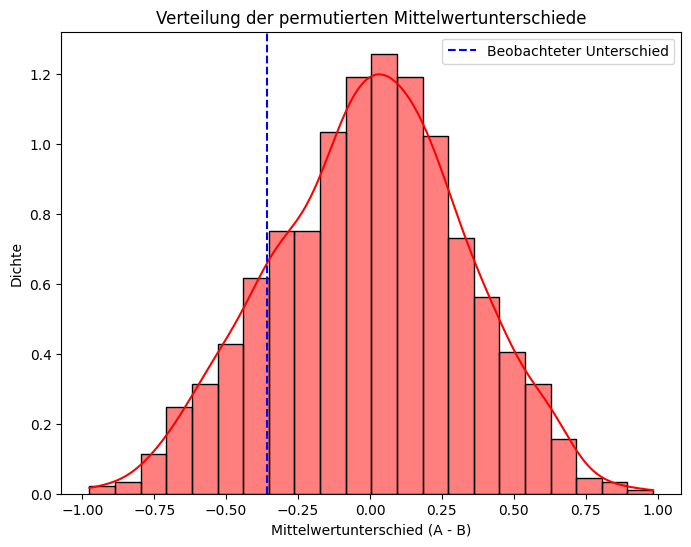

p-Wert: 0.2900
→ Kein signifikanter Unterschied auf dem 5%-Niveau (H₀ wird beibehalten).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Daten laden
data = pd.read_csv("/Users/muellefa/repos/ASTAT/SW07/Daten/web_page_data.csv")

# Filter nach Seiten
page_a = data[data["Page"] == "Page A"]["Time"]
page_b = data[data["Page"] == "Page B"]["Time"]

# Plot Setup
fig = plt.figure(figsize=(15, 7))

# Page A
ax1 = fig.add_subplot(1, 2, 1)
sns.histplot(page_a, bins=np.arange(-0.5, 5.5), stat="density", color="red", ax=ax1)
ax1.set_title("Website A", fontsize=13, pad=10)
ax1.set_xlabel("Zeit auf der Website (Sekunden)")
ax1.set_ylabel("Dichte")

# Page B
ax2 = fig.add_subplot(1, 2, 2)
sns.histplot(page_b, bins=np.arange(-0.5, 5.5), stat="density", color="blue", ax=ax2)
ax2.set_title("Website B", fontsize=13, pad=10)
ax2.set_xlabel("Zeit auf der Website (Sekunden)")
ax2.set_ylabel("Dichte")

plt.tight_layout()
plt.show()

# Mittelwerte ausgeben
print(f"Durchschnittliche Verweildauer A: {page_a.mean():.2f} Sekunden")
print(f"Durchschnittliche Verweildauer B: {page_b.mean():.2f} Sekunden")
observed_diff = page_a.mean() - page_b.mean()
print("Beobachteter Unterschied der Mittelwerte:", round(observed_diff,3))

# Permutationsverfahren unterschied mit Menge 1000
np.random.seed(42)  # for reproducibility

# Combine all times
combined = np.concatenate([page_a, page_b])
n_a = len(page_a)

# Generate 1000 permuted differences
perm_diffs = []
for _ in range(1000):
    np.random.shuffle(combined)
    perm_a = combined[:n_a]
    perm_b = combined[n_a:]
    diff = perm_a.mean() - perm_b.mean()
    perm_diffs.append(diff)

perm_diffs = np.array(perm_diffs)

# plote Permutationsverfahren
plt.figure(figsize=(8,6))
sns.histplot(perm_diffs, kde=True, color="red", stat="density")
plt.axvline(observed_diff, color="blue", linestyle="--", label="Beobachteter Unterschied")
plt.title("Verteilung der permutierten Mittelwertunterschiede")
plt.xlabel("Mittelwertunterschied (A - B)")
plt.ylabel("Dichte")
plt.legend()
plt.show()

p_value = np.mean(np.abs(perm_diffs) >= np.ab s(observed_diff))
print(f"p-Wert: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("→ Unterschied ist signifikant auf dem 5%-Niveau (H₀ wird verworfen).")
else:
    print("→ Kein signifikanter Unterschied auf dem 5%-Niveau (H₀ wird beibehalten).")



### <span style="color:rgb(160,0,86)">Aufgabe 2 (Konversionen im E-Commerce)</span>

**Konversionen** im E-Commerce sind die **Aktionen**, die Nutzer auf einer E-Commerce-Seite durchführen. Die **Konversionsrate** ist ein wichtiger Leistungsindikator für die Effektivität von Marketingkampagnen und Webdesign. Betrachten wir ein Unternehmen, das **zwei Preise** vergleicht:

$$\begin{array}{c|cc}
&\text{Preis A}&\text{Preis B}\\ \hline 
\text{Konversion}&200&182\\
\text{keine Konversion}&23539&22406\end{array}$$

**Preis A bringt fast 5% mehr Konversionen als Preis B:** 

$$\begin{array}{ll}
\text{Konversionsrate bei Preis A:}&\displaystyle 100\cdot\frac{200}{23539+200}\approx 0.8425\%\\
\text{Konversionsrate bei Preis B:}&\displaystyle 100\cdot\frac{182}{22406+182}\approx 0.8057\% \rule{0cm}{1.2cm}
\end{array}$$

Der ***prozentuale Unterschied von Preis B zu Preis A*** ist

$$\frac{100}{0.8057}\cdot(0.8425-0.8057)=4.567\;, \;\,\text{ also fast 5\%.}$$

Wir haben hier mehr als 45000 Datenpunkte, und es ist ***verlockend, dies als grosse Datenmenge zu betrachten***, die keine statistischen Signifikanztests erfordern. Die Konversionsraten sind jedoch so niedrig (weniger als 1%), dass die tatsächlich aussagekräftigen Werte - die Konversionen - nur im Hunderterbereich liegen, und der erforderliche Stichprobenumfang wird tatsächlich durch diese Konversionen bestimmt. 

Mit Hilfe eines **Hypothesen-Tests** können wir testen, ob der Unterschied bei den Umsätzen zwischen den Preisen A und B im Bereich der zufälligen Abweichung liegt. Die **Nullhypothese** verkörpert, dass es **keinen Unterschied zwischen den Konversionsraten gibt**. 

- Bestimmen Sie mit dem **Permutationsverfahren** eine Menge von 1000 permutierten Unterschieden und stellen Sie die Verteilung dieser permutierten **Unterschiede in einem Dichtediagramm** dar. Geben Sie auch den **p-Wert** an!
- Zeichnen Sie in das gleiche Dichtediagramm auch den **beobachteten Unterschied** ein.   
- Machen Sie den **Testentscheid** auf einem Signifikanzniveau von $\alpha = 5\%$. 


Beobachteter Unterschied: 0.000368


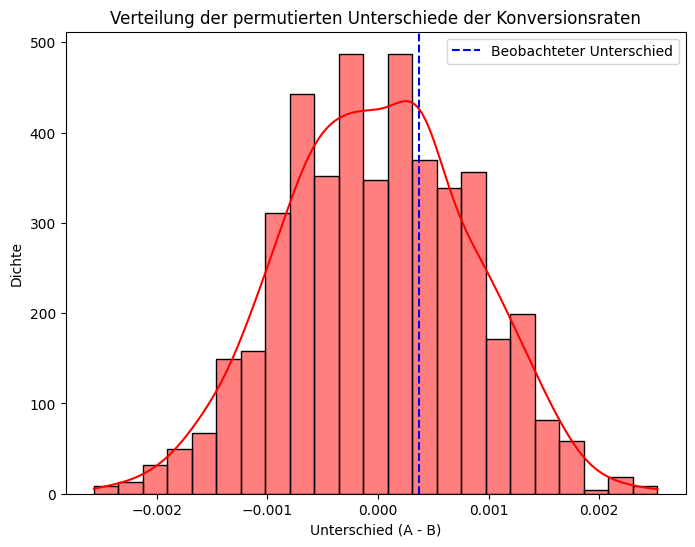

p-Wert: 0.707000
→ Kein signifikanter Unterschied zwischen den Konversionsraten (H₀ wird beibehalten).


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Konversionsdaten
conv_a = 200
no_conv_a = 23539
conv_b = 182
no_conv_b = 22406

# Stichproben
group_a = np.array([1]*conv_a + [0]*no_conv_a)
group_b = np.array([1]*conv_b + [0]*no_conv_b)

# Beobachteter Unterschied der Konversionsraten
obs_diff = group_a.mean() - group_b.mean()
print(f"Beobachteter Unterschied: {obs_diff:.6f}")

# Permutationsverfahren
np.random.seed(42)

combined = np.concatenate([group_a, group_b])
n_a = len(group_a)
perm_diffs = []

for _ in range(1000):
    np.random.shuffle(combined)
    perm_a = combined[:n_a]
    perm_b = combined[n_a:]
    perm_diffs.append(perm_a.mean() - perm_b.mean())

perm_diffs = np.array(perm_diffs)

# Plot
plt.figure(figsize=(8,6))
sns.histplot(perm_diffs, kde=True, color="red", stat="density")
plt.axvline(obs_diff, color="blue", linestyle="--", label="Beobachteter Unterschied")
plt.title("Verteilung der permutierten Unterschiede der Konversionsraten")
plt.xlabel("Unterschied (A - B)")
plt.ylabel("Dichte")
plt.legend()
plt.show()

p_value = np.mean(np.abs(perm_diffs) >= np.abs(obs_diff))
print(f"p-Wert: {p_value:.6f}")
alpha = 0.05
if p_value < alpha:
    print("→ Signifikanter Unterschied zwischen den Konversionsraten (H₀ wird verworfen).")
else:
    print("→ Kein signifikanter Unterschied zwischen den Konversionsraten (H₀ wird beibehalten).")




### <span style="color:rgb(160,0,86)">Aufgabe 3 (Bestellzeit pro Kunde)</span>

Ein Online-Shop möchte überprüfen, ob die **durchschnittliche Bestellzeit pro Kunde** nach einem Systemupdate verändert wurde.

Vor dem Update lag die durchschnittliche Bestellzeit bei **5.2 Minuten**.
Nach dem Update wurden **100 neue Bestellzeiten gemessen**.

- **Laden Sie die Daten** der Stichprobe in der Datei *bestellzeiten.csv* im Ordner Daten. 
- Zeichnen Sie für die Bestelldauer einen **Regenwolkenplot**.

Mit einem **Bootstrap-Test** soll geprüft werden, ob sich die durchschnittliche Bestellzeit signifikant vom bisherigen Wert unterscheidet:
- Formulieren Sie die **Null- und Alternativhypothese**, führen Sie den **Bootstrap-Test** mit einer geeigneten Anzahl von Wiederholungen durch und interpretieren Sie den **p-Wert** auf einem **Signifikanznieveau von 5%**.

In [3]:
# To do!

![HSLU](Bilder/LogoHSLU.png)